# Pymaceuticals Inc.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_comb_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
mouse_comb_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
mouse_count = len(mouse_comb_df["Mouse ID"].unique())
mouse_count

249

In [7]:
mouse_duplicate = mouse_comb_df.loc[mouse_comb_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [9]:
mouse_duplicate_df = mouse_comb_df.loc[mouse_comb_df["Mouse ID"] == "g989"]
mouse_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
mouse_clean = mouse_comb_df[mouse_comb_df["Mouse ID"].isin(mouse_duplicate)==False]
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
mouse_count_2 = len(mouse_clean["Mouse ID"].unique())
mouse_count_2

248

# Summary Statistics

In [20]:
mouse_grouped = mouse_clean.groupby(["Drug Regimen"])
tumor_mean = mouse_grouped["Tumor Volume (mm3)"].mean()
tumor_med = mouse_grouped["Tumor Volume (mm3)"].median()
tumor_var  = mouse_grouped["Tumor Volume (mm3)"].var()
tumor_st_dev = mouse_grouped["Tumor Volume (mm3)"].std()
tumor_sem = mouse_grouped["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                        "Median Tumor Volume": tumor_med,
                        "Tumor Volume Variance": tumor_var,
                        "Tumor Volume Std. Dev.": tumor_st_dev,
                        "Tumor Volume Std. Err.": tumor_sem})
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [21]:
mouse_grouped.count().head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


<Figure size 576x360 with 0 Axes>

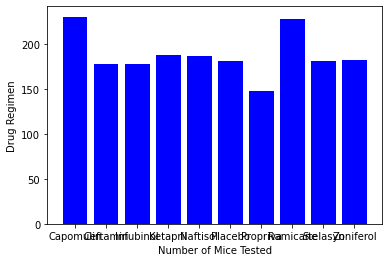

<Figure size 576x360 with 0 Axes>

In [37]:
x_axis = mouse_grouped.count().index
y_axis = mouse_grouped["Mouse ID"].count()
plt.bar(x_axis, y_axis, color="blue", align="center")
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regimen")
plt.figure(figsize=(8,5))

Sorry this is incomplete! I will resubmit my finished code as soon as i can.